In [1]:
!pip install spotipy --upgrade

In [ ]:
import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials as cc
import numpy as np
import pandas as pd
from IPython.display import display
import warnings
import time
import json
from pprint import pprint
from spotipy.oauth2 import SpotifyClientCredentials

In [5]:
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id = '85bc9d29761941f2a0dafdc9aa8a4903',client_secret = 'e1ee091ccf0b44b6a0dc243abb2f1414'),requests_timeout=10, retries=10)

In [18]:
playlists = []
path = 'data'
count = 5
for filename in os.listdir(path):
    count -= 1
    if count < 0:
        break
    f = os.path.join(path, filename)
    if os.path.isfile(f):
        d = json.load(open(f))
        playlists.append(pd.DataFrame(d['playlists']))

playlists = pd.concat(playlists)
playlists = playlists.reset_index(drop=True)
print(playlists.shape)

(5000, 12)


In [19]:
songs = []
for i in range(len(playlists)):
    tracks = playlists.iloc[i].loc['tracks']
    for track in tracks:
        songs.append(track)

songs_df = pd.DataFrame(songs)
print(songs_df.shape)
songs_df.head()

(334487, 8)


,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name
0,0,Lost Frequencies,spotify:track:2vCtiBvJJZfz773yTfAxPP,spotify:artist:7f5Zgnp2spUuuzKplmRkt7,What Is Love 2016 - Mike Mago Remix,spotify:album:4N1e8k2o2NN932Y8xgZV1p,209882,What Is Love 2016
1,1,John Legend,spotify:track:5WOLZP8KrXiupBjG1SSN5U,spotify:artist:5y2Xq6xcjJb2jVM54GHK3t,Love Me Now - Dave Audé Remix Radio Edit,spotify:album:2CFZOjwtV7B6XzULEwIdHN,219106,Love Me Now (Remixes)
2,2,July Child,spotify:track:0oQDQ9QiqsO63EEBAro8Le,spotify:artist:3Jghk94Gog2dhBAO7ZZaM8,Thinkin of U,spotify:album:2i0oT2HtRN4o3P45zQjel7,194000,Thinkin of U
3,3,Tiësto,spotify:track:7MUS0La2IQ85vJ59fQqtoN,spotify:artist:2o5jDhtHVPhrJdv3cEQ99Z,I Will Be Here - (Wolfgang Gartner Remix),spotify:album:2qY9UxNEbQR2O2ECc3Fd48,237066,Kaleidoscope Remixed
4,4,Joe Stone,spotify:track:3ciyZYofjiqmMUElM5qgGB,spotify:artist:4kwEd1P9j15ZqUVP5zK7Pv,The Party (This Is How We Do It),spotify:album:3SBDe6WBbEXNtjraPxXLOh,185807,The Party (This Is How We Do It)


In [20]:
songs_df = songs_df.drop_duplicates('track_uri')
print(songs_df.shape)

(108870, 8)


In [25]:
#DO NOT RUN THE AUDIO FEATURES HAVE ALREADY BEEN STORED IN THE AUDIO_FEATURES FILE
def run_features():
    sleep_min = 1
    sleep_max = 2
    start_time = time.time()
    request_count = 0
    tracks_w_features = pd.DataFrame()
    for i in range(0,3344):
        if request_count % 13 == 0:
            time.sleep(np.random.uniform(sleep_min, sleep_max))
        else:
            tracks_to_get = songs_df.iloc[request_count:request_count+49]["track_uri"] #get the uri of these songs to get audio features
            tracks = pd.DataFrame(sp.audio_features(tracks_to_get))
            tracks_w_features = tracks_w_features.append(tracks)
        request_count+=49

    #remove useless-categorical columns, can use index to get song information later
    # tracks_w_features = tracks_w_features.drop(columns=['mode','key','time_signature', 'duration_ms','analysis_url','track_href','id','type']).copy()
    warnings.filterwarnings("ignore")
    warnings.filterwarnings(action='once')

    from pathlib import Path
    filepath = Path('audio_features.csv')
    filepath.parent.mkdir(parents=True, exist_ok=True)
    tracks_w_features.to_csv(filepath)

In [26]:
# songs = pd.read_csv('recommender-systems/allsongs.csv')
run_features()



# result_artist = sp.artist(songs_df['artist_uri'][0])
# result_song = sp.audio_features(songs_df['track_uri'][0])
# result_song = sp.track(songs_df['track_uri'][0])
# print(result_artist)
# print()
# print("--------------------------------------------")
# print()
# print(result_song)

In [8]:
data = pd.read_csv('audio_features.csv')
data = data.drop(columns=['Unnamed: 0','0','mode','key','time_signature','analysis_url','track_href','id','type']).copy()
# print(data[data['uri'].str.len() == len('spotify:track:6EpRaXYhGOB3fj4V2uDkMJ')])


print(len(data))
data.head()


101526

In [11]:
pop = []
sleep_min = 1
sleep_max = 2
start_time = time.time()
request_count = 0
count = 0
# 2337
for i in range(0,2336):
        if request_count % 13 == 0:
            time.sleep(np.random.uniform(sleep_min, sleep_max))
            count += 1
        else:

            tracks_to_get = data.iloc[request_count:request_count+43]["uri"] #get the uri of these songs to get audio features
            track_list = sp.tracks(tracks_to_get)
            # pop.extend(sp.tracks(tracks_to_get)['popularity'])
            for j in track_list['tracks']:
                # print('here')
                if j is None:
                    pop.append(None)
                else:
                    pop.append(j['popularity'])
        request_count+=43
        if i % 100 == 0:
            print(i)
        if i > 2300:
            if i % 2 == 0:
                print(i)

print(count)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2302
2304
2306
2308
2310
2312
2314
2316
2318
2320
2322
2324
2326
2328
2330
2332
2334
180


In [12]:
# 8818
len(pop)

92708

In [16]:
n = 8818
data = data.iloc[:-n]
len(data)

92708

In [17]:
data["track_popularity"] = pop
data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,uri,valence,track_popularity
0,0.0660,0.853,199533.0,0.785,0.00000,0.0445,-5.943,0.2640,101.027,spotify:track:6ITDAE1VFqNtNBJ51uI1Jl,0.8020,0.0
1,0.0514,0.838,195988.0,0.765,0.00021,0.0297,-2.332,0.0462,100.021,spotify:track:5H7CwzYZ60e7w69tX4ivQN,0.9050,48.0
2,0.0524,0.779,204347.0,0.787,0.00000,0.1400,-4.305,0.1080,124.982,spotify:track:0CcQNd8CINkwQfe1RDtGV6,0.7080,28.0
3,0.2460,0.869,204502.0,0.485,0.00000,0.0765,-5.595,0.0545,106.028,spotify:track:6EpRaXYhGOB3fj4V2uDkMJ,0.5270,24.0
4,0.0767,0.652,182453.0,0.512,0.12500,0.0879,-8.908,0.0302,95.070,spotify:track:1SQQI3opeV0kr71tf0224D,0.0509,0.0


In [22]:
data = data.rename(columns={'uri': 'track_uri'})

In [24]:
songs_df.head()

,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name
0,0,Lost Frequencies,spotify:track:2vCtiBvJJZfz773yTfAxPP,spotify:artist:7f5Zgnp2spUuuzKplmRkt7,What Is Love 2016 - Mike Mago Remix,spotify:album:4N1e8k2o2NN932Y8xgZV1p,209882,What Is Love 2016
1,1,John Legend,spotify:track:5WOLZP8KrXiupBjG1SSN5U,spotify:artist:5y2Xq6xcjJb2jVM54GHK3t,Love Me Now - Dave Audé Remix Radio Edit,spotify:album:2CFZOjwtV7B6XzULEwIdHN,219106,Love Me Now (Remixes)
2,2,July Child,spotify:track:0oQDQ9QiqsO63EEBAro8Le,spotify:artist:3Jghk94Gog2dhBAO7ZZaM8,Thinkin of U,spotify:album:2i0oT2HtRN4o3P45zQjel7,194000,Thinkin of U
3,3,Tiësto,spotify:track:7MUS0La2IQ85vJ59fQqtoN,spotify:artist:2o5jDhtHVPhrJdv3cEQ99Z,I Will Be Here - (Wolfgang Gartner Remix),spotify:album:2qY9UxNEbQR2O2ECc3Fd48,237066,Kaleidoscope Remixed
4,4,Joe Stone,spotify:track:3ciyZYofjiqmMUElM5qgGB,spotify:artist:4kwEd1P9j15ZqUVP5zK7Pv,The Party (This Is How We Do It),spotify:album:3SBDe6WBbEXNtjraPxXLOh,185807,The Party (This Is How We Do It)


In [26]:
len(songs_df)
data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,track_uri,valence,track_popularity
0,0.0660,0.853,199533.0,0.785,0.00000,0.0445,-5.943,0.2640,101.027,spotify:track:6ITDAE1VFqNtNBJ51uI1Jl,0.8020,0.0
1,0.0514,0.838,195988.0,0.765,0.00021,0.0297,-2.332,0.0462,100.021,spotify:track:5H7CwzYZ60e7w69tX4ivQN,0.9050,48.0
2,0.0524,0.779,204347.0,0.787,0.00000,0.1400,-4.305,0.1080,124.982,spotify:track:0CcQNd8CINkwQfe1RDtGV6,0.7080,28.0
3,0.2460,0.869,204502.0,0.485,0.00000,0.0765,-5.595,0.0545,106.028,spotify:track:6EpRaXYhGOB3fj4V2uDkMJ,0.5270,24.0
4,0.0767,0.652,182453.0,0.512,0.12500,0.0879,-8.908,0.0302,95.070,spotify:track:1SQQI3opeV0kr71tf0224D,0.0509,0.0


In [30]:
full_data = pd.merge(
    songs_df, data, on='track_uri', how='inner'
)
full_data.head()

,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms_x,album_name,acousticness,danceability,duration_ms_y,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,track_popularity
0,7,Fabri Fibra,spotify:track:6ITDAE1VFqNtNBJ51uI1Jl,spotify:artist:7u710e44HW3K7A5eTnRqHC,Fenomeno,spotify:album:3Ox0clmVCoxyyb220bti6r,199533,Fenomeno,0.0660,0.853,199533.0,0.785,0.00000,0.0445,-5.943,0.2640,101.027,0.8020,0.0
1,8,Ed Sheeran,spotify:track:5H7CwzYZ60e7w69tX4ivQN,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V,Shape of You - Galantis Remix,spotify:album:6K5S3fWJ6logqsusWVaJUG,195988,Shape of You,0.0514,0.838,195988.0,0.765,0.00021,0.0297,-2.332,0.0462,100.021,0.9050,48.0
2,9,Imagine Dragons,spotify:track:0CcQNd8CINkwQfe1RDtGV6,spotify:artist:53XhwfbYqKCa1cC15pYq2q,Believer,spotify:album:5GlPAy2PRJW06GVFhKwGTl,204346,Evolve,0.0524,0.779,204347.0,0.787,0.00000,0.1400,-4.305,0.1080,124.982,0.7080,28.0
3,10,Liam Payne,spotify:track:6EpRaXYhGOB3fj4V2uDkMJ,spotify:artist:5pUo3fmmHT8bhCyHE52hA6,Strip That Down,spotify:album:2mnDyPSNM02LMvniaMWnLl,204502,Strip That Down,0.2460,0.869,204502.0,0.485,0.00000,0.0765,-5.595,0.0545,106.028,0.5270,24.0
4,11,Møme,spotify:track:1SQQI3opeV0kr71tf0224D,spotify:artist:4lDXfIznmGueBgTjI3qGUX,Mirage,spotify:album:4ZaeYUM5vgvkpexijZ3w2r,182453,Panorama,0.0767,0.652,182453.0,0.512,0.12500,0.0879,-8.908,0.0302,95.070,0.0509,0.0


In [38]:
ls

README.md             audio_features.csv    full_data.csv
SpotipyApi.ipynb      data/                 pre_processing.ipynb


In [1]:
full_data.to_csv('full_data.csv')

NameError: name 'full_data' is not defined

In [6]:
full_data = pd.read_csv('full_data.csv')

pop_artist = []
sleep_min = 1
sleep_max = 2
start_time = time.time()
request_count = 0
count = 0
# 2337
for i in range(0,2457):
        if request_count % 13 == 0:
            time.sleep(np.random.uniform(sleep_min, sleep_max))
            count += 1
        else:

            artists_to_get = full_data.iloc[request_count:request_count+43]["artist_uri"] #get the uri of these songs to get audio features
            track_list = sp.artists(artists_to_get)
            for j in track_list['artists']:
                # print('here')
                if j is None:
                    pop_artist.append(None)
                else:
                    pop_artist.append(j['popularity'])
        request_count+=43
        if i % 100 == 0:
            print(i)
        if i > 2300:
            if i % 2 == 0:
                print(i)

print(count)

0


KeyboardInterrupt: 

In [1]:
full_data = pd.read_csv('audio_features.csv')

import seaborn as sns


NameError: name 'pd' is not defined

/tmp/ipykernel_23426/2337843447.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = good_songs.corr(method = "pearson")


[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'duration_ms'),
 Text(2.5, 0, 'explicit'),
 Text(3.5, 0, 'danceability'),
 Text(4.5, 0, 'energy'),
 Text(5.5, 0, 'key'),
 Text(6.5, 0, 'loudness'),
 Text(7.5, 0, 'mode'),
 Text(8.5, 0, 'speechiness'),
 Text(9.5, 0, 'acousticness'),
 Text(10.5, 0, 'instrumentalness'),
 Text(11.5, 0, 'liveness'),
 Text(12.5, 0, 'valence'),
 Text(13.5, 0, 'tempo'),
 Text(14.5, 0, 'time_signature')]

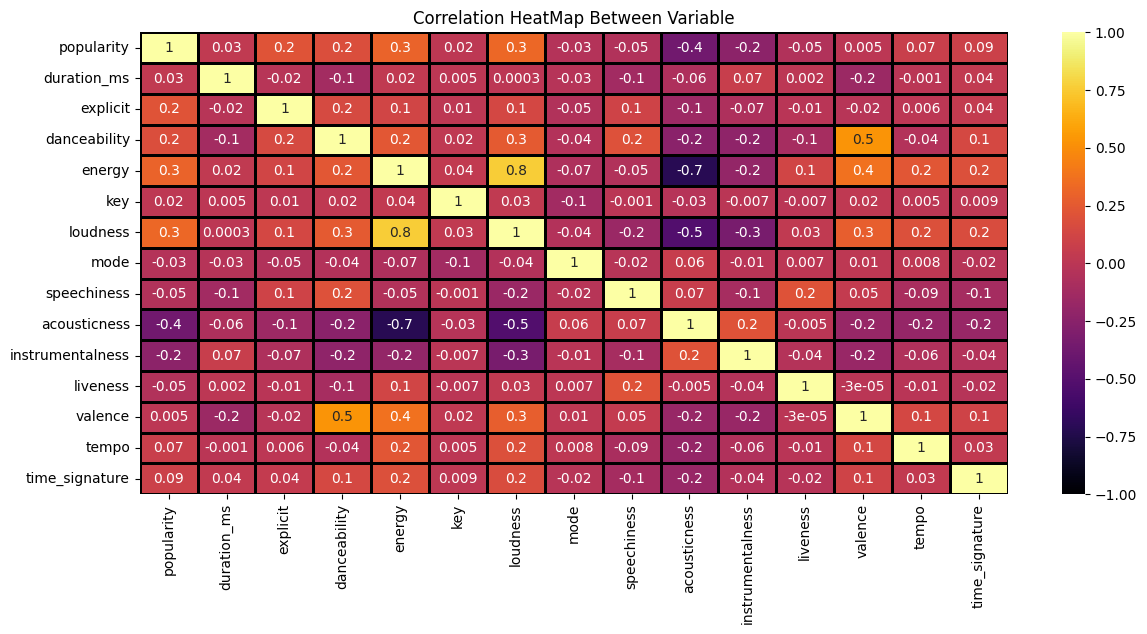

In [57]:
good_songs = full_data#[full_data['track_popularity'] > 0]


import matplotlib.pyplot as plt

corr_df = good_songs.corr(method = "pearson")
plt.figure(figsize = (14,6))
heatmap = sns.heatmap(corr_df, annot = True, fmt = ".1g", vmin = -1, vmax = 1, center = 0, cmap = "inferno", linewidths = 1, linecolor = "Black")
heatmap.set_title("Correlation HeatMap Between Variable")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 90)

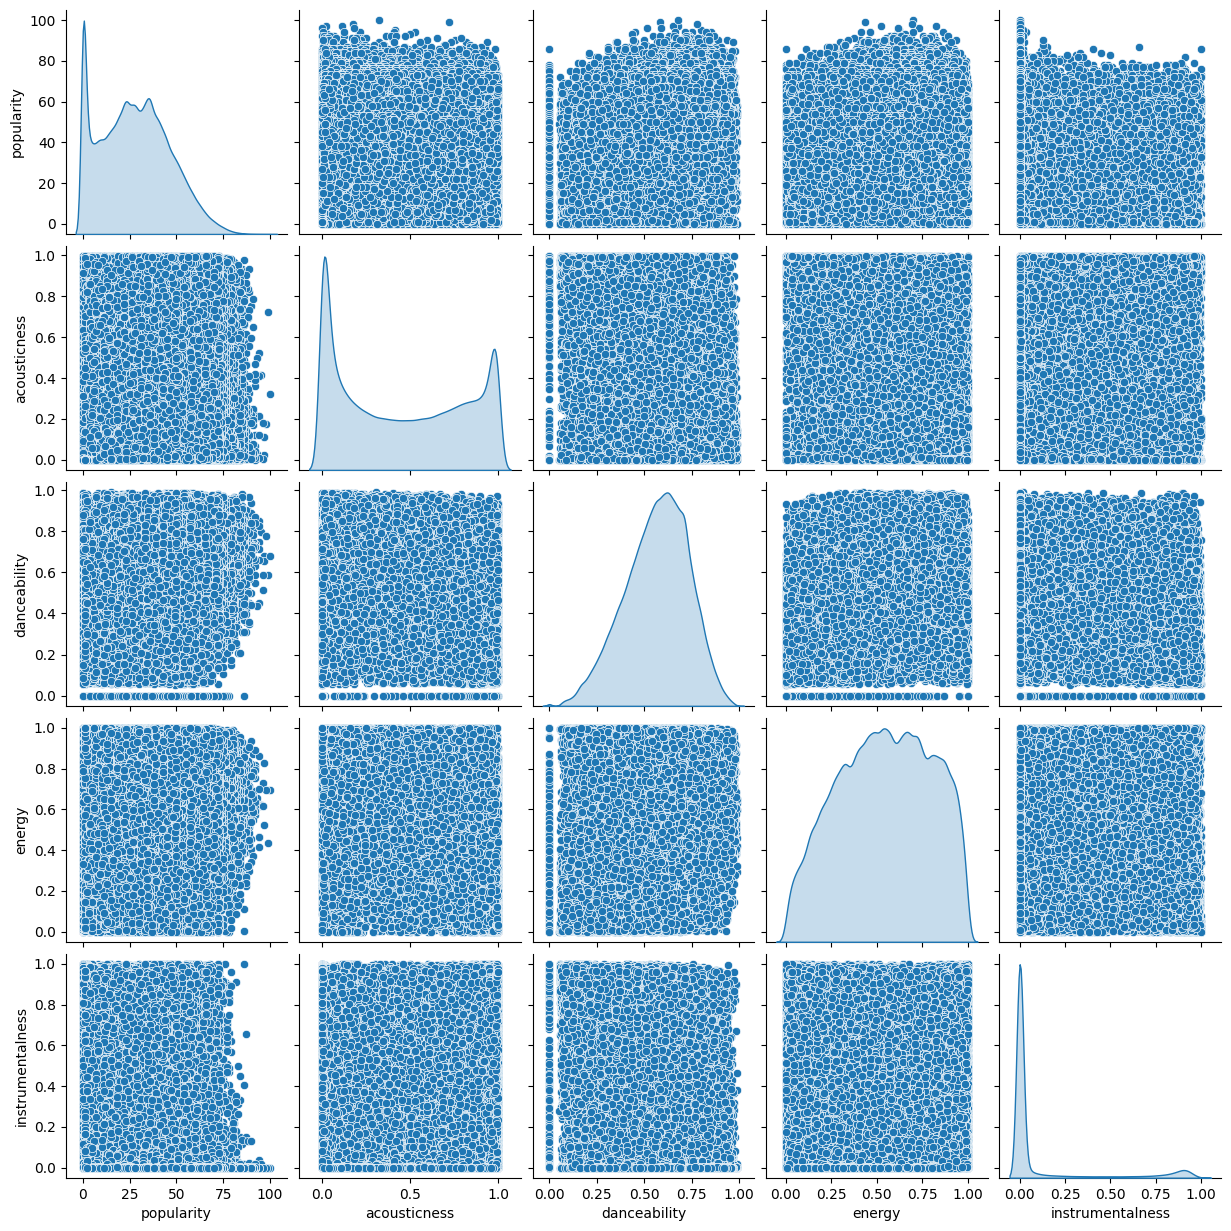

In [59]:
kde = sns.pairplot(good_songs[['popularity', 'acousticness', 'danceability', 
                           'energy', 'instrumentalness']], diag_kind="kde")

<Axes: xlabel='loudness', ylabel='track_popularity'>

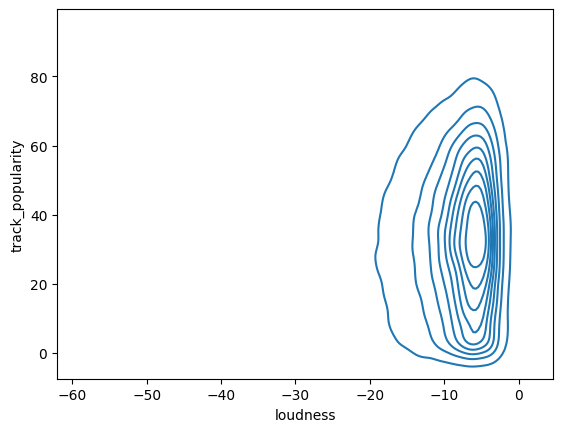

In [42]:
sns.kdeplot(data=good_songs, x='loudness', y='track_popularity')

<Axes: xlabel='energy', ylabel='track_popularity'>

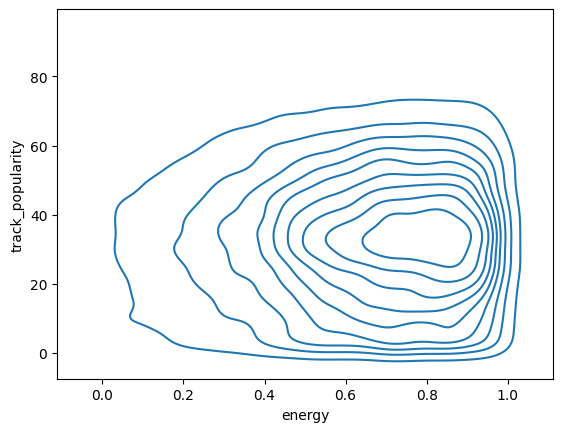

In [43]:
sns.kdeplot(data=good_songs, x='energy', y='track_popularity')

In [60]:
good_songs.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586672.0,230051.167286,126526.087418,3344.0,175093.0000,214893.000000,263867.00000,5621218.000
explicit,586672.0,0.044086,0.205286,0.0,0.0000,0.000000,0.00000,1.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
mode,586672.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996


### Model Logistic regression

In [68]:
! pip install sklearn

Defaulting to user installation because normal site-packages is not writeable


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
#from xgboost import XGBClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [72]:
dataframe = good_songs
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "speechiness", "tempo", "valence"]

training = dataframe.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['popularity']
X_test = dataframe.drop(training.index)[features]


X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_valid)
LR_Accuracy = accuracy_score(y_valid, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

LR_AUC = roc_auc_score(y_valid, LR_Predict) 
print("AUC: " + str(LR_AUC))


/home/roya/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.07621340605957301


ValueError: multi_class must be in ('ovo', 'ovr')